In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,NaN,NaN,NaN,NaN,NaN
1,15624510.0,Male,19.0,19000.0,0.0
2,NaN,NaN,NaN,NaN,NaN
3,15810944.0,Male,35.0,20000.0,0.0
4,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    float64
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    float64
dtypes: float64(4), object(1)
memory usage: 28.2+ KB


In [5]:
df.dropna(inplace=True)
df.drop('User ID',axis=1,inplace=True)
df.drop('Gender',axis=1,inplace=True)

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
1,19.0,19000.0,0.0
3,35.0,20000.0,0.0
5,26.0,43000.0,0.0
7,27.0,57000.0,0.0
9,19.0,76000.0,0.0


In [7]:
df['EstimatedSalary']=df['EstimatedSalary'].astype(int)
df['Purchased'] = df['Purchased'].astype(int)

In [8]:
df.head()

,Age,EstimatedSalary,Purchased
1,19.0,19000,0
3,35.0,20000,0
5,26.0,43000,0
7,27.0,57000,0
9,19.0,76000,0


In [9]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

In [11]:
x.head()

,Age,EstimatedSalary
1,19.0,19000
3,35.0,20000
5,26.0,43000
7,27.0,57000
9,19.0,76000


In [12]:
y.head()

1    0
3    0
5    0
7    0
9    0
Name: Purchased, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
X_train

,Age,EstimatedSalary
185,26.0,15000
447,60.0,102000
469,38.0,112000
465,40.0,107000
755,42.0,53000
...,...,...
647,48.0,30000
385,29.0,43000
235,36.0,52000
95,27.0,54000


In [15]:
X_test

,Age,EstimatedSalary
265,30.0,87000
619,38.0,50000
683,35.0,75000
393,30.0,79000
493,35.0,50000
...,...,...
433,49.0,65000
519,45.0,131000
99,31.0,89000
477,46.0,82000


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
x_train_scaler = scaler.transform(X_train)
x_test_scaler = scaler.transform(X_test)

In [20]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [21]:
x_train_scaler = pd.DataFrame(x_train_scaler,columns=X_train.columns)
x_test_scaler = pd.DataFrame(x_test_scaler,columns=X_test.columns)

In [22]:
x_train_scaler

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [26]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


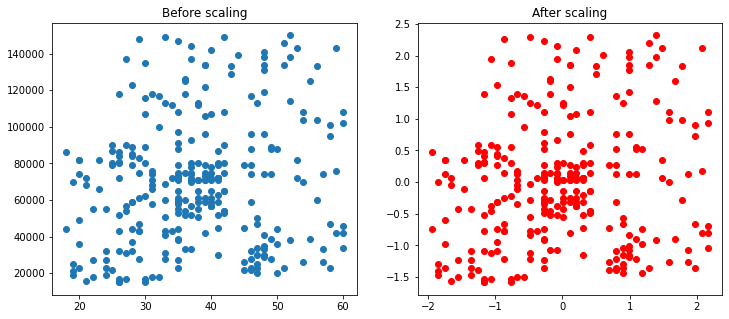

In [33]:
#effect of scaling
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before scaling')
ax2.scatter(x_train_scaler['Age'],x_train_scaler['EstimatedSalary'],color='red')
ax2.set_title('After scaling')
plt.show()

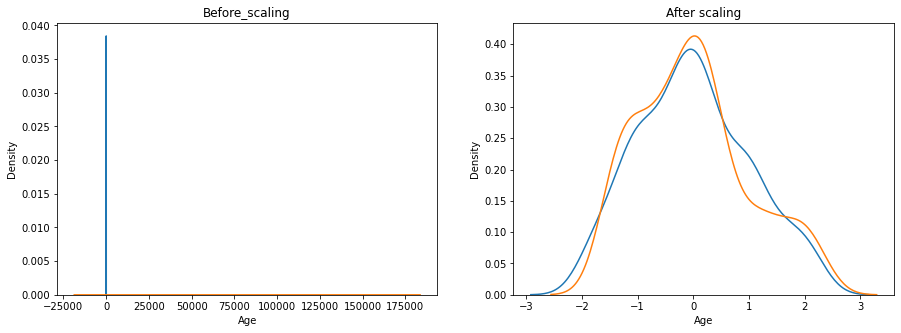

In [34]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title('Before_scaling')
sns.kdeplot(x_train_scaler['Age'],ax=ax2)
sns.kdeplot(x_train_scaler['EstimatedSalary'],ax=ax2)
ax2.set_title('After scaling')
plt.show()

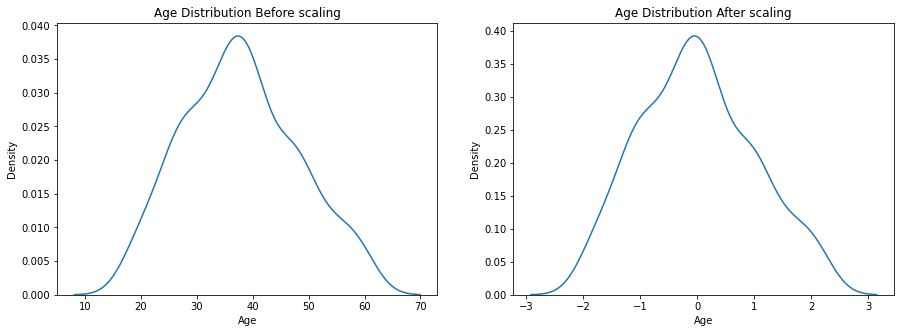

In [35]:
#comparison of Distributions
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.set_title('Age Distribution Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title('Age Distribution After scaling')
sns.kdeplot(x_train_scaler['Age'],ax=ax2)
plt.show()

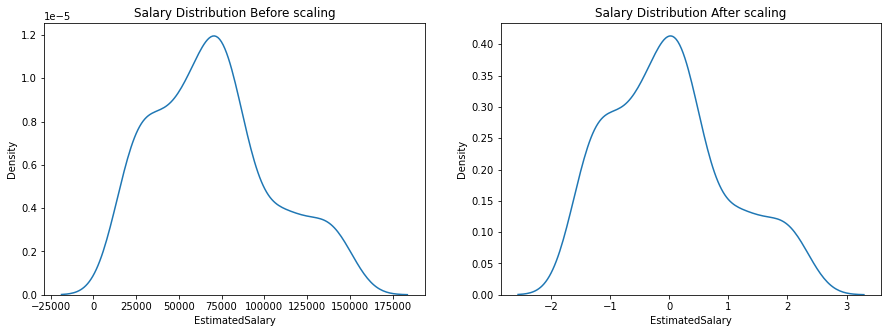

In [36]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.set_title('Salary Distribution Before scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('Salary Distribution After scaling')
sns.kdeplot(x_train_scaler['EstimatedSalary'],ax=ax2)
plt.show()

In [37]:
#Why scaling is important
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [43]:
lr.fit(X_train,y_train)
lr_scaled.fit(x_train_scaler,y_train)

LogisticRegression()

In [44]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(x_test_scaler)

In [45]:
#accuracy
from sklearn.metrics import accuracy_score

In [47]:
print('Actual ',accuracy_score(y_test,y_pred))
print('Scaled ',accuracy_score(y_test,y_pred_scaled))

Actual  0.6583333333333333
Scaled  0.8666666666666667


In [48]:
#In decision tree both are same result
from sklearn.tree import DecisionTreeClassifier

In [49]:
lr = DecisionTreeClassifier()
lr_scaled = DecisionTreeClassifier()

In [50]:
lr.fit(X_train,y_train)
lr_scaled.fit(x_train_scaler,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(x_test_scaler)

In [52]:
#accuracy
from sklearn.metrics import accuracy_score

In [53]:
print('Actual ',accuracy_score(y_test,y_pred))
print('Scaled ',accuracy_score(y_test,y_pred_scaled))

Actual  0.875
Scaled  0.8666666666666667
